# <span style="color:darkorange"> Labo 03 Centrum- & spreidingsmaten in python opgave

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

De dataset die in deze opdracht gebruikt wordt is een dataset genaamd **Penguins_preprocessed.csv**. Deze dataset bevat dataset bevat de data van verschillende pinguïns. Deze dataset is origineel bedoeld om te kijken of het mogelijk is om te voorspellen tot welke soort een pinguïns behoort aan de hand van de andere variabelen.

<img src='penguins.jpg'>

<br />

| Variable | Beschrijving |
| --- | --- | 
|studyName 	|De studie waar de data van de penguin oorspronkelijk vandaan komt. |
|Sample Number|	Een unieke ID die iedere penguin die in het onderzoek voorkomt krijgt.
|Species |	 De soorten penguins die voorkomen in de dataset.|
|Island | Het eiland waar de penguin geobserveerd werd.|
|Clutch Completion | Of er minstens 1 eitje uit het nest uitgekomen is.|
|Culmen Length (mm) |	De lengte van de snavel in millimeter. |
|Culmen Depth (mm) | De diepte van de snavel in millimeter. |
|Flipper Length (mm)  	| De lengte van de vin in millimeter. |
|Body Mass (g) | Het gewicht van de penguin in gram. |
|Sex | Het geslacht (binair: 1 - vrouw or 0 - man)|
|Comments | Specifieke commentaar die bij een bepaalde penguin hoort.|

<br />   
lees de dataset in en toon de eerste 7 rijen

In [30]:
#dataset inlezen
df = pd.read_csv('penguins_preprocessed.csv')
df.head(7)

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin,Torgersen,Yes,39.1,18.7,181.0,3750.0,0
1,Adelie Penguin,Torgersen,Yes,39.5,17.4,186.0,3800.0,1
2,Adelie Penguin,Torgersen,Yes,40.3,18.0,195.0,3250.0,1
3,Adelie Penguin,Torgersen,Yes,36.7,19.3,193.0,3450.0,1
4,Adelie Penguin,Torgersen,Yes,39.3,20.6,190.0,3650.0,0
5,Adelie Penguin,Torgersen,No,38.9,17.8,181.0,3625.0,1
6,Adelie Penguin,Torgersen,No,39.2,19.6,195.0,4675.0,0


Hoeveel pinguïns zijn er in de dataset?

In [31]:
df.count()

Species                333
Island                 333
Clutch Completion      333
Culmen Length (mm)     333
Culmen Depth (mm)      333
Flipper Length (mm)    333
Body Mass (g)          333
Sex                    333
dtype: int64

Wat is het maximum gewicht van de penguings, is dit een mannetje of en vrouwtje?

In [32]:
y = df['Body Mass (g)'].max()
df[df['Body Mass (g)']==y].Sex

231    0
Name: Sex, dtype: int64

Welke soort penguin is de penguin met de langste flipper length?

In [33]:
y= df['Flipper Length (mm)'].max()
df[df['Flipper Length (mm)']==y].Species


276    Gentoo Penguin
Name: Species, dtype: object

Bepaal de verdeling tussen het aantal mannetjes en vrouwtjes. Maak vervolgens een staafdiagram die de verhouding weergeeft.

Text(0.5, 1.0, 'Staafdiagram mannen vs vrouwen')

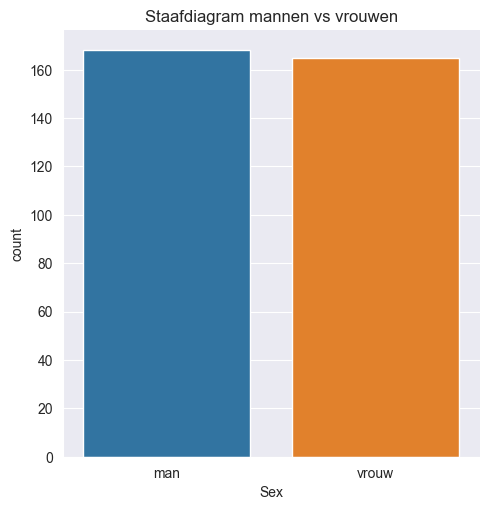

In [34]:

sns.catplot(data=df, x='Sex',kind='count')
plt.xticks([0,1],['man','vrouw'])
plt.title('Staafdiagram mannen vs vrouwen')


Plot de histogram van het gewicht van de penguins. Bereken hiervoor zelf de klassebreedtes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Aantal')

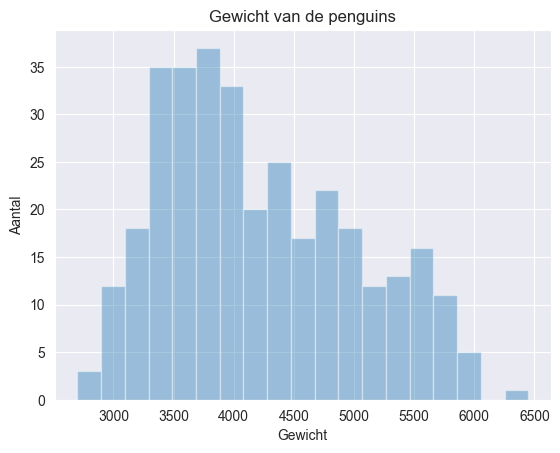

In [35]:
rang = df['Body Mass (g)'].max() - df['Body Mass (g)'].min()
bins = (rang/np.sqrt(df['Body Mass (g)'].count()))
bins = np.arange(df['Body Mass (g)'].min(), df['Body Mass (g)'].max()+bins, bins)
sns.distplot(x=df['Body Mass (g)'], bins=bins, kde=False)
plt.title('Gewicht van de penguins')
plt.xlabel('Gewicht')
plt.ylabel('Aantal')

Bereken nu de centrummaten en spreidingsmaten van het gewicht van de pinguïns. Bepaal met andere woorden: 
- Het gemiddelde - mean()
- De mediaan - median()
- Variantie - var()
- Standaardafwijking - std()
- De range - max() - min()
- Q1 en Q3 en bereken hieruit de interkwartielafstand: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
- De scheefheid - skew()
- De kurtosis - kurt()
- De modus - mode

Reflecteren deze centrummaten en spreidingsmaten wat je afleest op het histogram? Kijk dan vooral naar het gemiddelde, standaardafwijking en scheefheid

In [36]:
print(f"Het gemiddelde is {df['Body Mass (g)'].mean()}")
print(f"Mediaan: {df['Body Mass (g)'].median()}")
print(f"Var: {df['Body Mass (g)'].var()}")
print(f"Standaardafwijking is {df['Body Mass (g)'].std()}")
print(f"Q1: {df['Body Mass (g)'].quantile(0.25)}")
print(f"Q3: {df['Body Mass (g)'].quantile(0.75)}")
print(f"IQR: {df['Body Mass (g)'].quantile(0.75)-df['Body Mass (g)'].quantile(0.25)}")
rang = df['Body Mass (g)'].max()-df['Body Mass (g)'].min()
print(f"Skewness is {df['Body Mass (g)'].skew()}")
print(f"Kurt: {df['Body Mass (g)'].kurt()}")
print(df['Body Mass (g)'].mode)

print(f'We zien dat de grafiek linksscheef is dus de meeste penguins wegen rond 3500-4000 met een paar uitschieters naar rechts')

Het gemiddelde is 4207.057057057057
Mediaan: 4050.0
Var: 648372.487698542
Standaardafwijking is 805.2158019428965
Q1: 3550.0
Q3: 4775.0
IQR: 1225.0
Skewness is 0.4722460732964026
Kurt: -0.7334889525794943
<bound method Series.mode of 0      3750.0
1      3800.0
2      3250.0
3      3450.0
4      3650.0
5      3625.0
6      4675.0
7      3200.0
8      3800.0
9      4400.0
10     3700.0
11     3450.0
12     4500.0
13     3325.0
14     4200.0
15     3400.0
16     3600.0
17     3800.0
18     3950.0
19     3800.0
20     3800.0
21     3550.0
22     3200.0
23     3150.0
24     3950.0
25     3250.0
26     3900.0
27     3300.0
28     3900.0
29     3325.0
30     4150.0
31     3950.0
32     3550.0
33     3300.0
34     4650.0
35     3150.0
36     3900.0
37     3100.0
38     4400.0
39     3000.0
40     4600.0
41     3425.0
42     3450.0
43     4150.0
44     3500.0
45     4300.0
46     3450.0
47     4050.0
48     2900.0
49     3700.0
50     3550.0
51     3800.0
52     2850.0
53     3750.0
54     315

Doe nu hetzelfde voor de flipper length (dus plot de histogram en bereken de centrum- en spreidingsmaten; schrijf zeker jou conclusies neer!)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Aantal')

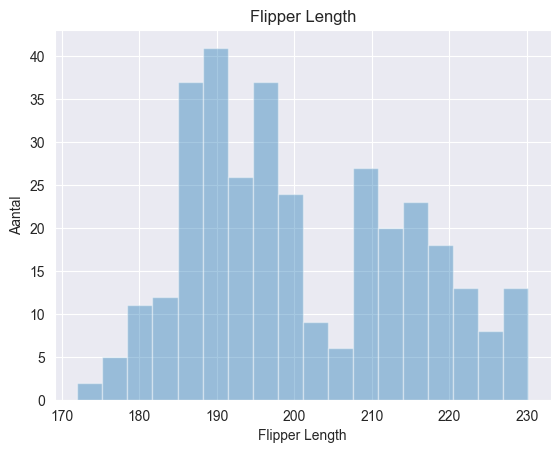

In [37]:
rang = df['Flipper Length (mm)'].max() - df['Flipper Length (mm)'].min()
bins2 = (rang/np.sqrt(df['Flipper Length (mm)'].count()))
bins2 = np.arange(df['Flipper Length (mm)'].min(), df['Flipper Length (mm)'].max(), bins2)
sns.distplot(x=df['Flipper Length (mm)'], bins=bins2, kde=False)
plt.title('Flipper Length')
plt.xlabel('Flipper Length')
plt.ylabel('Aantal')

In [38]:
print(f"Het gemiddelde is {df['Flipper Length (mm)'].mean()}")
print(f"De median is {df['Flipper Length (mm)'].median()}")
print(f"De var is {df['Flipper Length (mm)'].var()}")
print(f"Standaardafwijking is {df['Flipper Length (mm)'].std()}")
print(f"Q1 is {df['Flipper Length (mm)'].quantile(0.25)}")
print(f"Q3 is {df['Flipper Length (mm)'].quantile(0.75)}")
print(f"De IQR is{df['Flipper Length (mm)'].quantile(0.75)-df['Flipper Length (mm)'].quantile(0.25)}")
rang = df['Flipper Length (mm)'].max()-df['Flipper Length (mm)'].min()
print(f"Skewness is {df['Flipper Length (mm)'].skew()}")
print(f"Kurt: {df['Flipper Length (mm)'].kurt()}")
print(df['Flipper Length (mm)'].mode)
print(f'We zien 2 pieken een rond 190 en een rond 210')

Het gemiddelde is 200.96696696696696
De median is 197.0
De var is 196.44167661637542
Standaardafwijking is 14.015765288287879
Q1 is 190.0
Q3 is 213.0
De IQR is23.0
Skewness is 0.36014797697479267
Kurt: -0.9612410139399925
<bound method Series.mode of 0      181.0
1      186.0
2      195.0
3      193.0
4      190.0
5      181.0
6      195.0
7      182.0
8      191.0
9      198.0
10     185.0
11     195.0
12     197.0
13     184.0
14     194.0
15     174.0
16     180.0
17     189.0
18     185.0
19     180.0
20     187.0
21     183.0
22     187.0
23     172.0
24     180.0
25     178.0
26     178.0
27     188.0
28     184.0
29     195.0
30     196.0
31     190.0
32     180.0
33     181.0
34     184.0
35     182.0
36     195.0
37     186.0
38     196.0
39     185.0
40     190.0
41     182.0
42     190.0
43     191.0
44     186.0
45     188.0
46     190.0
47     200.0
48     187.0
49     191.0
50     186.0
51     193.0
52     181.0
53     194.0
54     185.0
55     195.0
56     185.0
57     1

Maak een boxplot van de lengte van de vin, zijn er uitschieters aanwezig in de dataset?

Ja er zijn aan beide kanten uitschieters


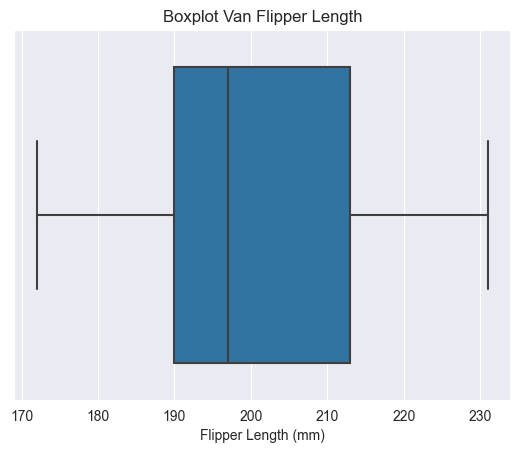

In [39]:
sns.boxplot(x=df['Flipper Length (mm)'], whis=1.5)
plt.title('Boxplot Van Flipper Length')
print('Ja er zijn aan beide kanten uitschieters')

Bepaal telkens de centrummaten en de histogram van de *Culmen Length (mm)* van mannetjes enerzijds en deze van vrouwtjes anderzijds.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Culmen Length')

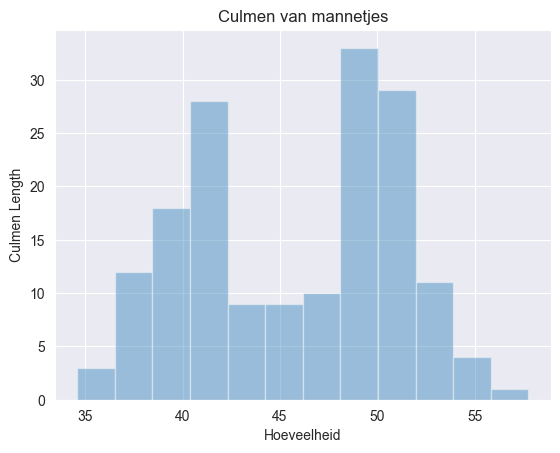

In [40]:
men = df['Sex'] ==0
vrouw = df['Sex']==1
rang = df[men]['Culmen Length (mm)'].max() - df[men]['Culmen Length (mm)'].min()
bins4 = (rang/np.sqrt(df[men]['Culmen Length (mm)'].count()))
bins4 = np.arange(df[men]['Culmen Length (mm)'].min(), df[men]['Culmen Length (mm)'].max(), bins4)
sns.distplot(x=df[men]['Culmen Length (mm)'], bins=bins4, kde=False)
plt.title('Culmen van mannetjes')
plt.xlabel('Hoeveelheid')
plt.ylabel('Culmen Length')

In [41]:
print(f"Het gemiddelde is {df[men]['Culmen Length (mm)'].mean()}")
print(f"Median: {df[men]['Culmen Length (mm)'].median()}")
print(f"Var: {df[men]['Culmen Length (mm)'].var()}")
print(f"Standaardafwijking is {df[men]['Culmen Length (mm)'].std()}")
print(f"Q1: {df[men]['Culmen Length (mm)'].quantile(0.25)}")
print(f"Q3: {df[men]['Culmen Length (mm)'].quantile(0.75)}")
print(f"IQR: {df[men]['Culmen Length (mm)'].quantile(0.75)-df['Culmen Length (mm)'].quantile(0.25)}")
rang = df['Culmen Length (mm)'].max()-df[men]['Culmen Length (mm)'].min()
print(f"Skewness is {df[men]['Culmen Length (mm)'].skew()}")
print(f"Kurt: {df[men]['Culmen Length (mm)'].kurt()}")
print(df[men]['Culmen Length (mm)'].mode)
print('We zien 2 duidelijke pieken een rond de 40 en een rond de 50')

Het gemiddelde is 45.85476190476191
Median: 46.8
Var: 28.803570002851437
Standaardafwijking is 5.366895751069834
Q1: 40.975
Q3: 50.324999999999996
IQR: 10.824999999999996
Skewness is -0.11446330510308939
Kurt: -1.132093382848734
<bound method Series.mode of 0      39.1
4      39.3
6      39.2
8      38.6
9      34.6
12     42.5
14     46.0
16     37.7
18     38.2
19     38.8
21     40.6
24     40.5
26     37.2
28     40.9
30     39.2
31     38.8
34     39.8
36     40.8
38     44.1
40     39.6
41     41.1
43     42.3
45     40.1
47     42.0
49     41.4
51     40.6
53     37.6
55     41.3
57     41.1
59     41.6
61     41.1
63     41.8
65     39.7
67     45.8
69     42.8
71     37.2
73     42.1
75     42.9
77     35.1
79     41.3
80     36.3
82     38.3
85     41.1
87     39.6
89     40.8
91     40.3
93     43.2
95     41.0
97     37.8
99     39.7
101    38.2
103    43.2
105    45.6
107    42.2
109    42.7
111    37.3
113    41.1
115    37.7
117    41.4
119    40.6
121    41.5
123    44.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Culmen Length')

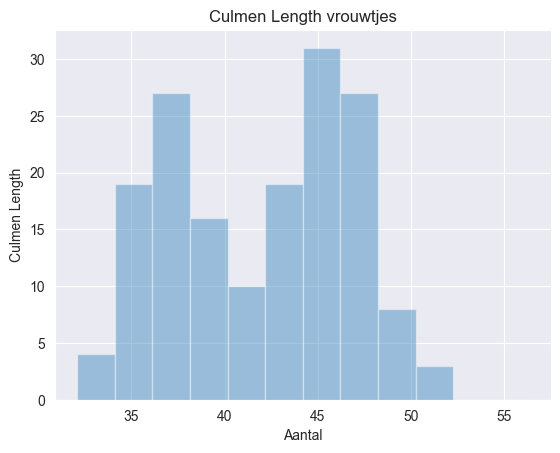

In [42]:
rang = df[vrouw]['Culmen Length (mm)'].max() - df[vrouw]['Culmen Length (mm)'].min()
bins3 = (rang/np.sqrt(df[vrouw]['Culmen Length (mm)'].count()))
bins3 = np.arange(df[vrouw]['Culmen Length (mm)'].min(), df[vrouw]['Culmen Length (mm)'].max(), bins3)
sns.distplot(x=df[vrouw]['Culmen Length (mm)'], bins=bins3, kde=False)
plt.title('Culmen Length vrouwtjes')
plt.xlabel('Aantal')
plt.ylabel('Culmen Length')

In [43]:
print(f"Het gemiddelde is {df[vrouw]['Culmen Length (mm)'].mean()}")
print(f"Median: {df[vrouw]['Culmen Length (mm)'].median()}")
print(f"Var: {df[vrouw]['Culmen Length (mm)'].var()}")
print(f"Standaardafwijking is {df[vrouw]['Culmen Length (mm)'].std()}")
print(f"Q1: {df[vrouw]['Culmen Length (mm)'].quantile(0.25)}")
print(f"Q3: {df[vrouw]['Culmen Length (mm)'].quantile(0.75)}")
print(f"IQR: {df[vrouw]['Culmen Length (mm)'].quantile(0.75)-df['Culmen Length (mm)'].quantile(0.25)}")
rang = df['Culmen Length (mm)'].max()-df[vrouw]['Culmen Length (mm)'].min()
print(f"Skewness is {df[vrouw]['Culmen Length (mm)'].skew()}")
print(f"Kurt: {df[vrouw]['Culmen Length (mm)'].kurt()}")
print(df[vrouw]['Culmen Length (mm)'].mode)
print('We zien 2 duidelijke pieken een rond de 23 en een rond de 45')

Het gemiddelde is 42.096969696969694
Median: 42.8
Var: 24.04407612712491
Standaardafwijking is 4.903475922967799
Q1: 37.6
Q3: 46.2
IQR: 6.700000000000003
Skewness is 0.05048733909952096
Kurt: -0.7796660417683343
<bound method Series.mode of 1      39.5
2      40.3
3      36.7
5      38.9
7      41.1
10     36.6
11     38.7
13     34.4
15     37.8
17     35.9
20     35.3
22     40.5
23     37.9
25     39.5
27     39.5
29     36.4
32     42.2
33     37.6
35     36.5
37     36.0
39     37.0
42     36.0
44     39.6
46     35.0
48     34.5
50     39.0
52     36.5
54     35.7
56     37.6
58     36.4
60     35.5
62     35.9
64     33.5
66     39.6
68     35.5
70     40.9
72     36.2
74     34.6
76     36.7
78     37.3
81     36.9
83     38.9
84     35.7
86     34.0
88     36.2
90     38.1
92     33.1
94     35.0
96     37.7
98     37.9
100    38.6
102    38.1
104    38.1
106    39.7
108    39.6
110    38.6
112    35.7
114    36.2
116    40.2
118    35.2
120    38.8
122    39.0
124    38.5
126

Iemand beweert dat vrouwtjes een grotere vin hebben dan mannetjes, klopt deze bewering? Staaf je antwoord aan de hand van centrum- en/of spreidingsmaten en/of grafieken.

In [44]:
print(f"Het gemiddelde  van mannen is {df[men]['Flipper Length (mm)'].mean()} en het gemiddelde van vrouwen is {df[vrouw]['Flipper Length (mm)'].mean()}")

Het gemiddelde  van mannen is 204.50595238095238 en het gemiddelde van vrouwen is 197.36363636363637


In [45]:
print(f"De mediaan  van mannen is {df[men]['Flipper Length (mm)'].median()} en de mediaan van vrouwen is {df[vrouw]['Flipper Length (mm)'].median()}")

De mediaan  van mannen is 200.5 en de mediaan van vrouwen is 193.0


Hieruit zien we dat de mannetjes duidelijk langer flipper length hebbem.


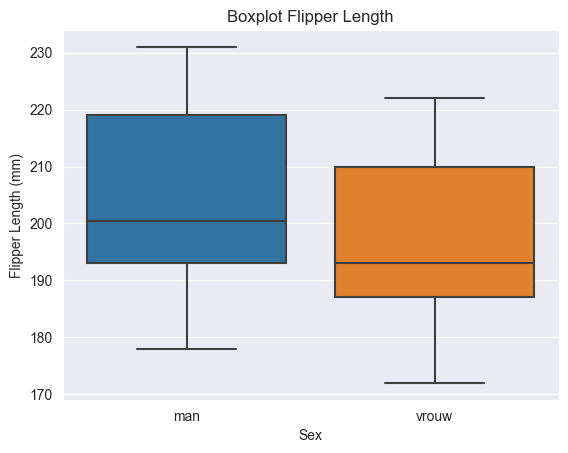

In [46]:
sns.boxplot(data=df, y='Flipper Length (mm)',x='Sex')
plt.title('Boxplot Flipper Length')
plt.xticks([1,0],['vrouw','man'])
print("Hieruit zien we dat de mannetjes duidelijk langer flipper length hebbem.")

Deze persoon beweert ook dat de clutch completion beinvloed wordt door het gewicht van de penguin en dat als een penguin meer weegt de kans op clutch completion groter is. klopt deze bewering? Staaf je antwoord aan de hand van centrummaten en/of grafieken.

Text(0.5, 1.0, 'Body Weight ten opzichte van CLutch COmpletion')

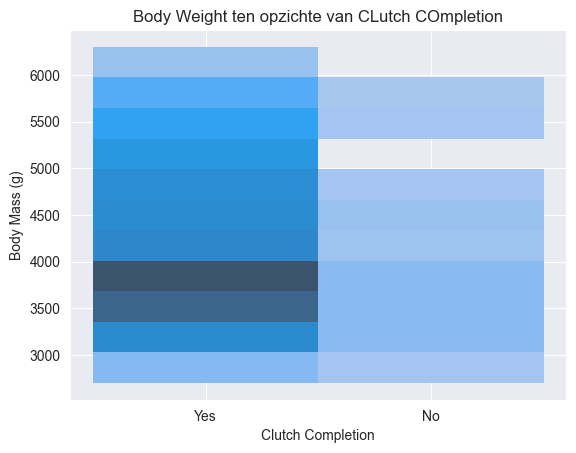

In [47]:
sns.histplot(data=df, x="Clutch Completion", y="Body Mass (g)")
plt.title('Body Weight ten opzichte van CLutch COmpletion')

In [57]:
print('Van deze grafiek zien we dat er neit direct een verband is')
df['Body Mass (g)'].value_counts(bins=bins)
procentl=[]
procentc= []
procentb=[]
sum=0
for i in range(len(bins)):
    if i != len(bins)-1:
        procentl.append(((df[(df['Body Mass (g)']>=bins[i]) & (df['Body Mass (g)']<=bins[i+1])]['Clutch Completion'])))
        ser = procentl[i].tolist()
        procentc.append(ser.count('Yes'))
        sum+=ser.count('Yes')
for i in range(len(bins)):
    if i != len(bins)-1:
        procentb.append(((df[(df['Body Mass (g)']>=bins[i]) & (df['Body Mass (g)']<=bins[i+1])]['Body Mass (g)'].count())/df['Body Mass (g)'].count())*100)
for i in range(len(procentc)):
    procentc[i]=(procentc[i]/sum)*100
print(procentb)
print(procentc)

Van deze grafiek zien we dat er neit direct een verband is
[0.9009009009009009, 3.6036036036036037, 5.405405405405405, 10.51051051051051, 10.51051051051051, 11.11111111111111, 9.90990990990991, 6.006006006006006, 7.5075075075075075, 5.105105105105105, 6.606606606606606, 5.405405405405405, 3.6036036036036037, 3.903903903903904, 4.804804804804805, 3.303303303303303, 1.5015015015015014, 0.0, 0.3003003003003003]
[0.6711409395973155, 3.3557046979865772, 5.369127516778524, 9.395973154362416, 10.40268456375839, 11.073825503355705, 10.06711409395973, 5.704697986577181, 8.053691275167784, 4.697986577181208, 7.046979865771812, 5.704697986577181, 4.026845637583892, 4.026845637583892, 5.033557046979865, 3.3557046979865772, 1.6778523489932886, 0.0, 0.33557046979865773]


Deze persoon beweert ook dat het gewicht heel duidelijk verschilt per soort. Klopt deze bewering? Gebruik de boxplot om je antwoord te staven

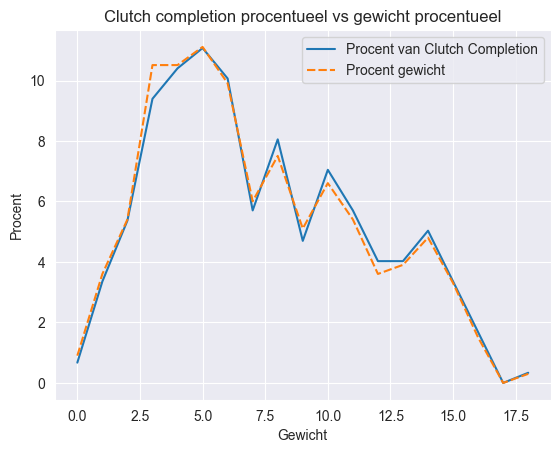

In [58]:
sns.lineplot(data=[procentc,procentb])
plt.legend(['Procent van Clutch Completion', 'Procent gewicht'])
plt.title('Clutch completion procentueel vs gewicht procentueel')
plt.xlabel('Gewicht')
plt.ylabel('Procent')
plt.show()

# <span style="color:Red"> Uitdaging (maar nog steeds verplicht om te maken)

lukt het jouw om de histogrammen van het gewicht van de mannetjes en vrouwtjes op dezelfde plot te krijgen? (analoog aan excel plot)

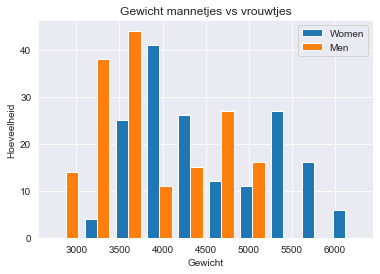

In [22]:
x = df[men]['Body Mass (g)']
y = df[vrouw]['Body Mass (g)']
lines = plt.hist([x,y])
plt.legend(['Women', 'Men'])
plt.title('Gewicht mannetjes vs vrouwtjes')
plt.xlabel('Gewicht')
plt.ylabel('Hoeveelheid')
plt.show()

Gaan penguings met een lange vin ook meer wegen? Is er een verband en is dit hetzelfde voor mannetjes en vrouwtjes?
Hint zoek de juiste soort plot om dit soort verbanden aan te kunnen tonen: https://seaborn.pydata.org/api.html

Uit deze heatmap kunnen we afleiden dat Flipper Length en Body mass een samenhorigheid hebben van +- 0.8. Dit betekent dat ze veel met elkaar te maken hebben.


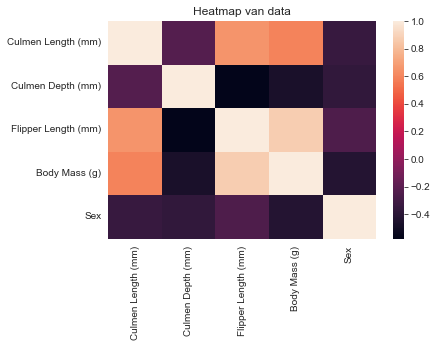

In [23]:
corr = df.corr()
sns.heatmap(corr)
plt.title('Heatmap van data')
print('Uit deze heatmap kunnen we afleiden dat Flipper Length en Body mass een samenhorigheid hebben van +- 0.8. Dit betekent dat ze veel met elkaar te maken hebben.')

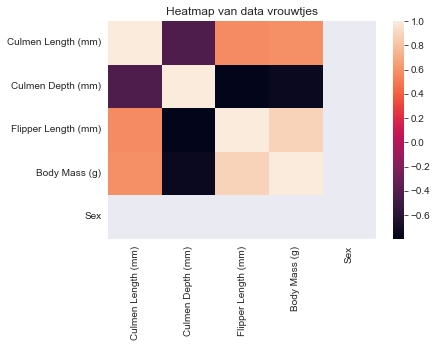

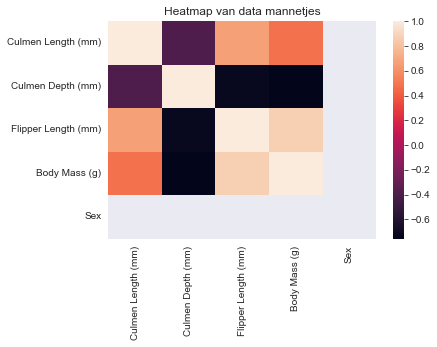

Uit deze 2 heatmaps kunnen we afleiden dat zowel voor mannetjes als vrouwtjes er een verband is tussen flipper length en body mass


In [24]:
corr = df[vrouw].corr()
sns.heatmap(corr)
plt.title('Heatmap van data vrouwtjes')
plt.show()
corr = df[men].corr()
sns.heatmap(corr)
plt.title('Heatmap van data mannetjes')
plt.show()
print('Uit deze 2 heatmaps kunnen we afleiden dat zowel voor mannetjes als vrouwtjes er een verband is tussen flipper length en body mass')